In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [68]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\Data\radars.csv")

In [69]:
df['Player'] = df['Player'].str.split('\\').str[0]

In [70]:
df = df[(df['Player'] == 'Tammy Abraham') | (df['Player'] == 'Timo Werner')]

In [71]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [72]:
df['Goals'] = df['Gls'] / df['90s']
df['xG'] = df['xG'] / df['90s']
df['Shots'] = df['Sh/90']
df['Shots on Target'] = df['SoT/90']
df['Goals - xG'] = df['G-xG']

In [73]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches',
       'Goals', 'Shots', 'Shots on Target', 'Goals - xG'],
      dtype='object')

In [74]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born','90s','Gls','Sh','SoT','G/Sh','G/SoT','Dist','npxG/Sh','np:G-xG','npxG','Matches','PK','FK','PKatt','Sh/90','SoT/90','G-xG'], axis=1)

In [75]:
df

,Player,SoT%,xG,Goals,Shots,Shots on Target,Goals - xG
1,Tammy Abraham,41.9,0.495575,0.530973,2.73,1.15,0.4
481,Timo Werner,38.2,0.409756,0.243902,2.69,1.03,-3.4


In [76]:
df.reset_index(drop=True, inplace=True)

In [77]:
# Parameters
params = list(df.columns)
params = params[1:]
params


['SoT%', 'xG', 'Goals', 'Shots', 'Shots on Target', 'Goals - xG']

In [78]:
# Range
ranges = []
a_values = []   
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*0.25)
    b = max(df[params][x])
    b = b + (b*0.25)
    ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x] == 'Tammy Abraham':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Timo Werner':
        b_values = df.iloc[x].values.tolist()

In [79]:
a_values = a_values[1:]

In [80]:
b_values = b_values[1:]    

In [81]:
values = [a_values,b_values]
values

[[41.9, 0.495575221238938, 0.5309734513274336, 2.73, 1.15, 0.4],
 [38.2, 0.40975609756097564, 0.24390243902439024, 2.69, 1.03, -3.4]]

In [82]:
title = dict(
    title_name='Tammy Abraham',
    title_color = 'red',
    subtitle_name = 'Chelsea',
    subtitle_color = 'red',
    title_name_2='Timo Werner',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@george__massey\nData from FBref / StatsBomb'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

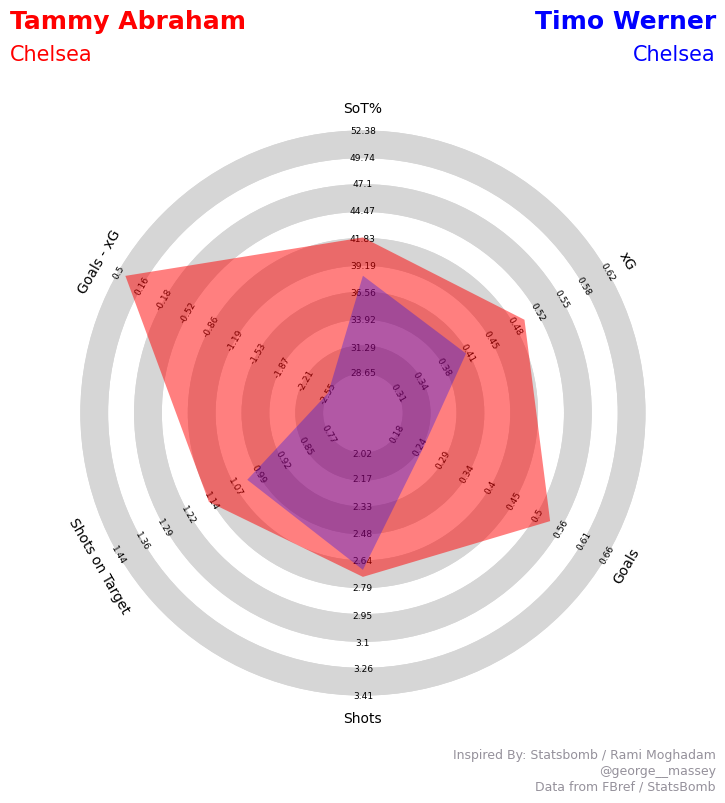

In [83]:
radar = Radar()

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['red','blue'], alphas=[0.5,0.3], 
                           title=title, endnote=endnote, compare=True)